In [2]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

## Ultima rede neural

In [3]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,8,bias=False)
        self.Matrix2 = nn.Linear(8,1,bias=False)
    def forward(self,x):
        x = self.Matrix1(x)
        x = self.Matrix2(x)
        return x.squeeze()
    
f = MyNeuralNet()
opt = SGD(f.parameters(), lr=0.001)
L = nn.MSELoss()

# Train model
losses = []
for _ in range(50):
    opt.zero_grad() # flush previous epoch's gradient
    loss_value = L(f(x), y) #compute loss
    loss_value.backward() # compute gradient
    opt.step() # Perform iteration using gradient above
    losses.append(loss_value.item())

In [4]:
y

tensor([1., 5., 2., 5.])

In [6]:
f(x)

tensor([2.8633, 2.5561, 1.8374, 5.2108], grad_fn=<SqueezeBackward0>)

## Adicionar funções de ativação para melhorar a rede

In [7]:
x = torch.tensor([[4,6,2,-1,6,2,5],[1,6,2,-6,5,-3,5]])
x

tensor([[ 4,  6,  2, -1,  6,  2,  5],
        [ 1,  6,  2, -6,  5, -3,  5]])

In [8]:
R = nn.ReLU()
R(x)

tensor([[4, 6, 2, 0, 6, 2, 5],
        [1, 6, 2, 0, 5, 0, 5]])

In [9]:
x = torch.linspace(-3,3,100)
y = R(x)

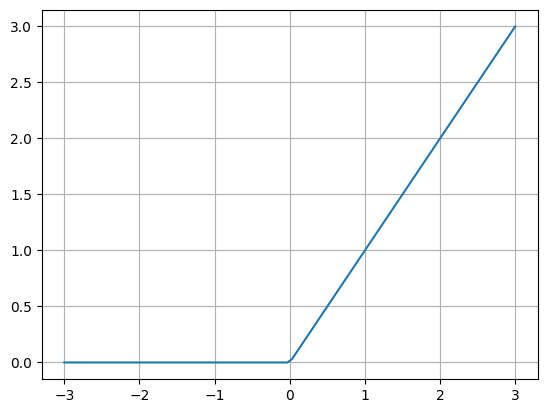

In [10]:
plt.plot(x.numpy(), y.numpy())
plt.grid()
plt.show()

In [11]:
class MyNeuralNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,8,bias=False)
        self.Matrix2 = nn.Linear(8,1,bias=False)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

In [12]:
def train_model(x,y,f, n_epochs=50):
    opt = SGD(f.parameters(), lr=0.001)
    L = nn.MSELoss()

    # Train model
    losses = []
    for _ in range(n_epochs):
        opt.zero_grad() # flush previous epoch's gradient
        loss_value = L(f(x), y) #compute loss
        loss_value.backward() # compute gradient
        opt.step() # Perform iteration using gradient above
        losses.append(loss_value.item())
    return f, losses

In [13]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f2 = MyNeuralNet2()

# Train model
f2, losses2 = train_model(x,y,f2, n_epochs=5000)

In [14]:
y

tensor([1., 5., 2., 5.])

In [15]:
f(x)

tensor([2.8633, 2.5561, 1.8374, 5.2108], grad_fn=<SqueezeBackward0>)

In [16]:
class MyNeuralNet3(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,80, bias=False)
        self.Matrix2 = nn.Linear(80,1, bias=False)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

In [17]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f3 = MyNeuralNet3()

# Train model
f3, losses3 = train_model(x,y,f3, n_epochs=5000)

In [19]:
y

tensor([1., 5., 2., 5.])

In [18]:
f3(x)

tensor([2.4661, 2.9750, 1.9256, 5.1665], grad_fn=<SqueezeBackward0>)

## Adicionando bias

In [21]:
class MyNeuralNet4(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,80)
        self.Matrix2 = nn.Linear(80,1)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

In [22]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f4 = MyNeuralNet4()

# Train model
f4, losses4 = train_model(x,y,f4, n_epochs=5000)

In [23]:
y

tensor([1., 5., 2., 5.])

In [24]:
f4(x)

tensor([1.6779, 4.1464, 2.0294, 5.0345], grad_fn=<SqueezeBackward0>)

## Adicionando mais uma matrix no meio

In [25]:
x

tensor([[6., 2.],
        [5., 2.],
        [1., 3.],
        [7., 6.]])

In [26]:
class MyNeuralNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,80)
        self.Matrix2 = nn.Linear(80,80)
        self.Matrix3 = nn.Linear(80,1)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f5 = MyNeuralNet5()

# Train model
f5, losses5 = train_model(x,y,f5, n_epochs=5000)

In [27]:
y

tensor([1., 5., 2., 5.])

In [28]:
f5(x)

tensor([0.9988, 4.9976, 1.9995, 4.9979], grad_fn=<SqueezeBackward0>)

## Rede neural sequencial